## **Libraries**

In [ ]:
import os
import torch
from torch import nn
import torchvision
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

## **Tensors**

In PyTorch, tensors are used to represent the inputs and outputs of a model, as well as the model's parameters.

Similar to NumPy’s ndarrays, tensors offer powerful multidimensional array capabilities, but with the added advantage of being able to run on GPUs and other hardware accelerators. Additionally, tensors and NumPy arrays can frequently share the same underlying memory, which removes the need for data duplication.



In [ ]:
# Initialize tensor from list
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(f"Data type of x_data:  {type(x_data)} \n")

# Initialize tensor from a NumPy array
np_array = np.array(data)
print(f"Data type of np_array:  {type(np_array)} \n")
x_np = torch.from_numpy(np_array)
print(f"Data type of x_data:  {type(x_data)} \n")

# Initialize tensor from other tensor

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

# Initialize tensor from dimesionsality input

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

# Attributes of a tensor

tensor = torch.rand(3,4).to('cuda')
print(tensor)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

# Indexing and slicing of tensor

tensor = torch.rand(4, 4)
print(tensor)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

# Joining two tensor
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

Data type of x_data:  <class 'torch.Tensor'> 

Data type of np_array:  <class 'numpy.ndarray'> 

Data type of x_data:  <class 'torch.Tensor'> 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4704, 0.4833],
        [0.2325, 0.0532]]) 

Random Tensor: 
 tensor([[0.6598, 0.7399, 0.4622],
        [0.0428, 0.4590, 0.2218]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.9738, 0.0928, 0.0922, 0.9502],
        [0.3310, 0.2153, 0.9549, 0.0525],
        [0.4433, 0.4532, 0.2853, 0.9320]], device='cuda:0')
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cuda:0
tensor([[0.1983, 0.7628, 0.5691, 0.7869],
        [0.2339, 0.1192, 0.0012, 0.9873],
        [0.7274, 0.0195, 0.2426, 0.9363],
        [0.6280, 0.8502, 0.1825, 0.1534]])
First row: tensor([0.1983, 0.7628, 0.5691, 0.7869])
First column: tensor([0.1983, 0.2339, 0.7274, 0.6280]

## **Datasets and Dataloaders**

### **Loading a Dataset from torchvision**

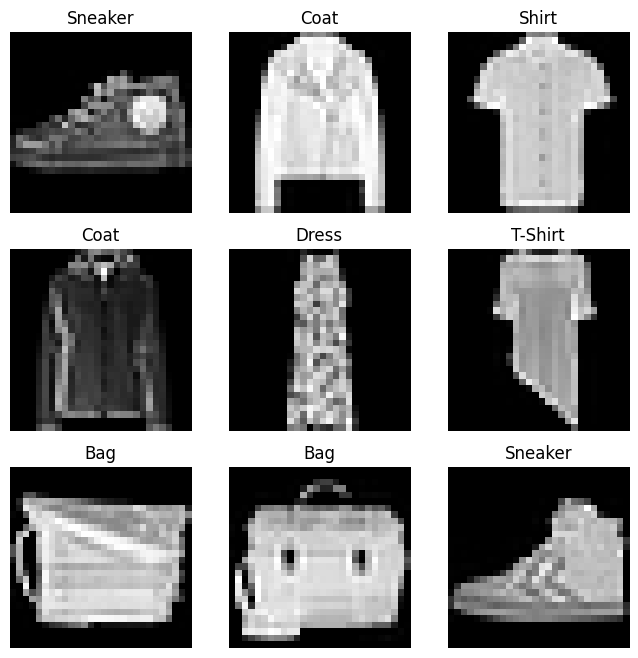

In [ ]:
training_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Iterating and Visualizing the Dataset


labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_dataset), size=(1,)).item()
    img, label = training_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

val_dataset, test_dataset = torch.utils.data.random_split(test_data, [0.8, 0.2])

### **Creating a Custom Dataset**

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### **DataLoaders**

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


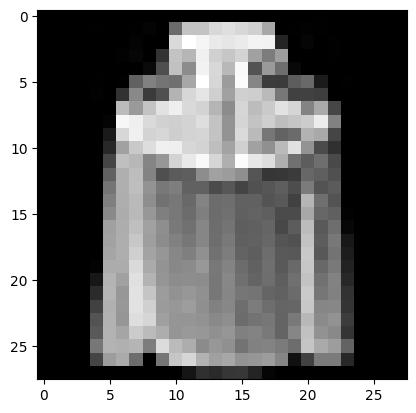

Label: 4


In [ ]:
train_dataloader = DataLoader(training_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Iterate through the DataLoader and Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


### Transforms

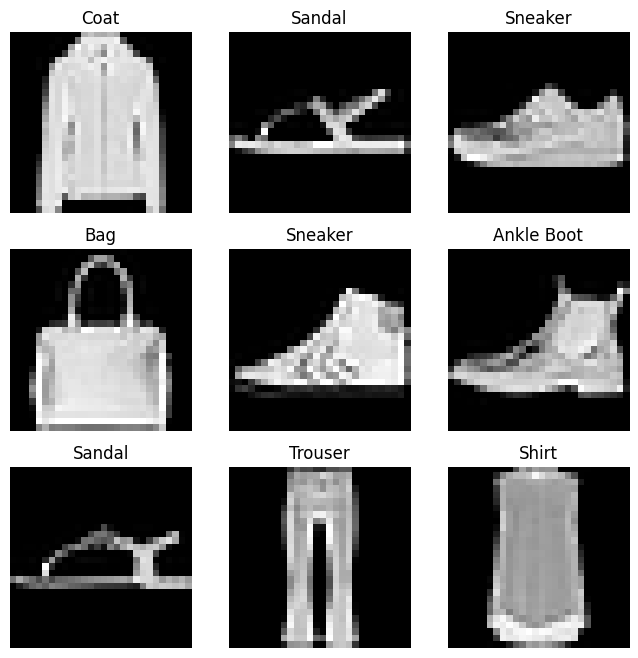

In [ ]:
training_data_onehot = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Iterating and Visualizing the Dataset


labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data_onehot), size=(1,)).item()
    img, label = training_data_onehot[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[(label==1).nonzero().squeeze().item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## **Get Device**

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


## **Define Model**

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Model Parameters

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0009,  0.0266,  0.0226,  ...,  0.0236, -0.0355, -0.0158],
        [ 0.0251,  0.0119,  0.0175,  ...,  0.0078,  0.0256,  0.0229]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0017, 0.0329], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0338, -0.0053,  0.0422,  ..., -0.0399, -0.0052,  0.0348],
        [-0.0226, -0.0282, -0.0159,  ...,  0.0381, -0.0107, -0.0273]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si

### **Hyperparameters**

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 3

### **Loss Function**

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimizer

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training and Validation function

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    total_loss = 0
    num_batches = len(dataloader)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return total_loss/num_batches


def val_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    val_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during validation mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            pred = model(X.to(device))
            val_loss += loss_fn(pred, y.to(device)).item()

    val_loss /= num_batches
    print(f"Validation loss: {val_loss:>8f} \n")

    return val_loss

### Implementation

In [ ]:
train_losses = []
val_losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_losses.append(train_loop(train_dataloader, model, loss_fn, optimizer))
    val_losses.append(val_loop(val_dataloader, model, loss_fn))
    torch.save(model.state_dict(), 'model_weights.pth')
print("Done!")

Epoch 1
-------------------------------
loss: 2.313628  [   64/60000]
loss: 2.286256  [ 6464/60000]
loss: 2.269504  [12864/60000]
loss: 2.267017  [19264/60000]
loss: 2.258403  [25664/60000]
loss: 2.223942  [32064/60000]
loss: 2.216205  [38464/60000]
loss: 2.183080  [44864/60000]
loss: 2.183525  [51264/60000]
loss: 2.152131  [57664/60000]
Validation loss: 2.147228 

Epoch 2
-------------------------------
loss: 2.133464  [   64/60000]
loss: 2.147459  [ 6464/60000]
loss: 2.106071  [12864/60000]
loss: 2.065043  [19264/60000]
loss: 2.078327  [25664/60000]
loss: 2.034501  [32064/60000]
loss: 2.034781  [38464/60000]
loss: 1.969997  [44864/60000]
loss: 1.938970  [51264/60000]
loss: 1.947736  [57664/60000]
Validation loss: 1.871213 

Epoch 3
-------------------------------
loss: 1.868629  [   64/60000]
loss: 1.832990  [ 6464/60000]
loss: 1.728755  [12864/60000]
loss: 1.745564  [19264/60000]
loss: 1.676596  [25664/60000]
loss: 1.675456  [32064/60000]
loss: 1.649745  [38464/60000]
loss: 1.644521

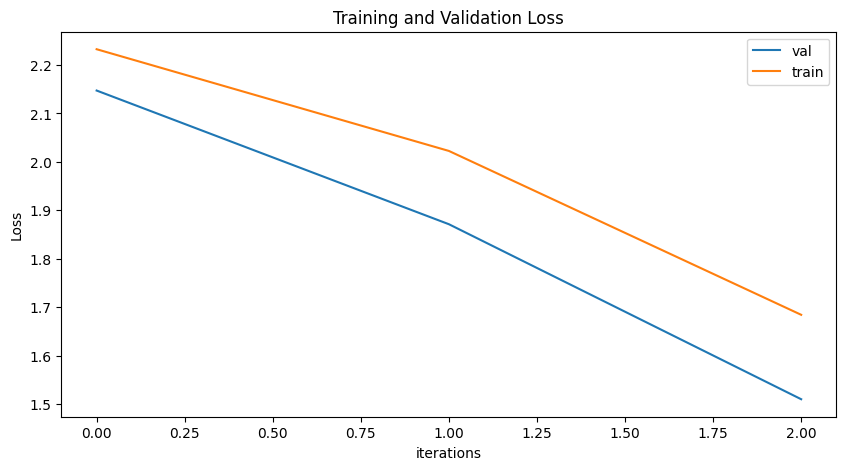

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Testing

In [ ]:
if (os.path.exists('model_weights.pth')):
  print("Loading Model")
  model.load_state_dict(torch.load('model_weights.pth', weights_only=True))

model.eval()
size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss, correct = 0, 0

# Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
# also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
with torch.no_grad():
    for X, y in test_dataloader:
        pred = model(X.to(device))
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

correct /= size
print(f"Test Accuracy: {(100*correct):>0.1f}%")

Loading Model
Test Accuracy: 59.2%


## **Hyperparameter Tunning**

In [ ]:
!pip install skorch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('/content/drive/MyDrive/Deep Learning/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
X = torch.tensor(X, dtype=torch.float32).cpu().numpy()
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1).cpu().numpy()



# PyTorch classifier
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(8, 12)
        self.act = nn.ReLU()
        self.output = nn.Linear(12, 1)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.layer(x))
        x = self.prob(self.output(x))
        return x

# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.SGD,
    max_epochs=100,
    batch_size=10,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'optimizer__lr': [0.001, 0.01, 0.1, 0.2, 0.3],
    'optimizer__momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
}

print(model.device)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 5.0 MB/s eta 0:00:00
cpu
Best: 0.678385 using {'optimizer__lr': 0.001, 'optimizer__momentum': 0.6}
0.666667 (0.023073) with: {'optimizer__lr': 0.001, 'optimizer__momentum': 0.0}
0.654948 (0.025582) with: {'optimizer__lr': 0.001, 'optimizer__momentum': 0.2}
0.675781 (0.025315) with: {'optimizer__lr': 0.001, 'optimizer__momentum': 0.4}
0.678385 (0.038318) with: {'optimizer__lr': 0.001, 'optimizer__momentum': 0.6}
0.675781 (0.022999) with: {'optimizer__lr': 0.001, 'optimizer__momentum': 0.8}
0.651042 (0.001841) with: {'optimizer__lr': 0.001, 'optimizer__momentum': 0.9}
0.554688 (0.146402) with: {'optimizer__lr': 0.01, 'optimizer__momentum': 0.0}
0.572917 (0.157687) with: {'optimizer__lr': 0.01, 'optimizer__momentum': 0.2}
0.661458 (0.015733) with: {'optimizer__lr': 0.01, 'optimizer__momentum': 0.4}
0.550781 (0.143949) with: {'optimizer__lr': 0.01, 'optimizer__momentum': 0.6}
0.552083 (0.145263) with: {'optimizer__lr': 0.01, 'optim

In [ ]:
# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    max_epochs=100,
    batch_size=10,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'optimizer': [optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta,
                  optim.Adam, optim.Adamax, optim.NAdam],
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# create model with skorch
model = NeuralNetClassifier(
    PimaClassifier,
    criterion=nn.BCELoss,
    optimizer=optim.Adam,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'batch_size': [10, 20, 40, 60, 80, 100],
    'max_epochs': [10, 50, 100]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
